# Iris Dataset Analysis

This repository contains a Jupyter notebook for exploratory data analysis and preprocessing on the classic Iris dataset.

## Features

- Loads and inspects the Iris dataset
- Handles missing values and outliers
- Encodes categorical variables
- Scales features for machine learning
- Visualizes data distributions and relationships

## Requirements

- Python 3.x
- pandas
- numpy
- matplotlib
- seaborn
- scikit-learn
- scipy

In [ ]:
# Importing essential libraries
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [ ]:
# Load the dataset
df=pd.read_csv('IRIS.csv')

# Display first few rows
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
# Get info about data types and missing values
df.info()
# Summary statistics for each column
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [ ]:
# Check the number of unique species in the dataset
df['species'].nunique()

3

In [66]:
# Encode the categorical 'species' column to numeric values
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['species']=le.fit_transform(df['species'])

In [67]:
# Separate features and target variable
y = df.iloc[:, -1]
X = df.iloc[:, :-1]

In [91]:
# Outlier removal using IQR method for numeric columns
columns_choose = ['sepal_length','sepal_width','petal_length','petal_width']
df_numeric = df[columns_choose]
Q1 = df_numeric.quantile(0.25)
Q3 = df_numeric.quantile(0.75)
IQR = Q3-Q1
lower_bound = Q1 - 1.5*IQR
upper_bound = Q3 - 1.5*IQR
df_cleaned = df[~((df_numeric < (Q1 - 1.5 * IQR)) | (df_numeric > (Q3 + 1.5 * IQR))).any(axis=1)]

In [92]:
# Feature scaling using StandardScaler
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_scaled=scaler.fit_transform(X)

In [93]:
# Check the shape of the dataset before and after cleaning
df.shape

(146, 5)

In [94]:
df_cleaned.describe()

,sepal_length,sepal_width,petal_length,petal_width,species
count,146.000000,146.000000,146.000000,146.000000,146.000000
mean,5.856849,3.036986,3.807534,1.219863,1.020548
std,0.834093,0.395145,1.757117,0.760365,0.817643
min,4.300000,2.200000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.400000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.000000,6.900000,2.500000,2.000000


In [95]:
# Update df to use the cleaned data
df=df_cleaned

In [96]:
# Split the dataset into training and testing sets
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X_scaled,y,test_size=0.2,random_state=42)

In [97]:
# Check the shape of the cleaned dataset
df.shape

(146, 5)

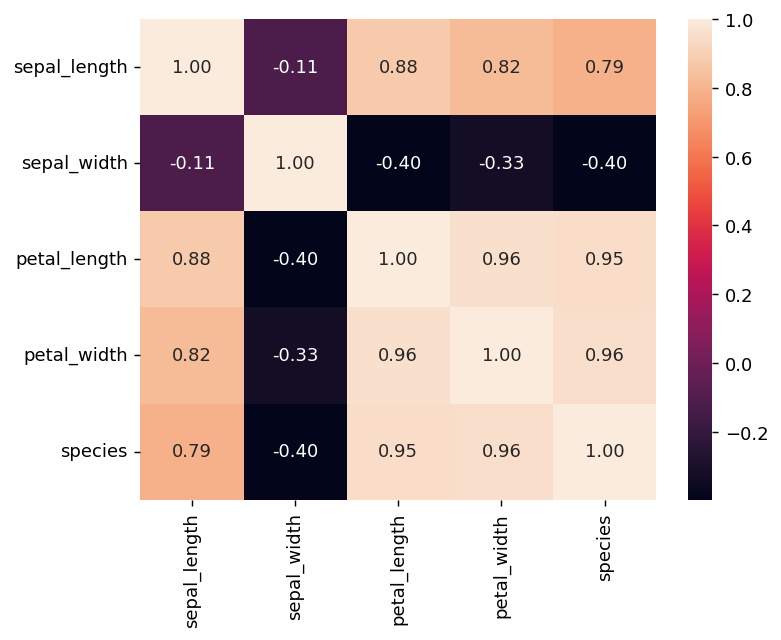

In [98]:
# Correlation heatmap for the features
corr = df.corr()

plt.figure(dpi=130)
sns.heatmap(corr, annot=True, fmt= '.2f')
plt.show()

<Axes: xlabel='petal_width', ylabel='Density'>

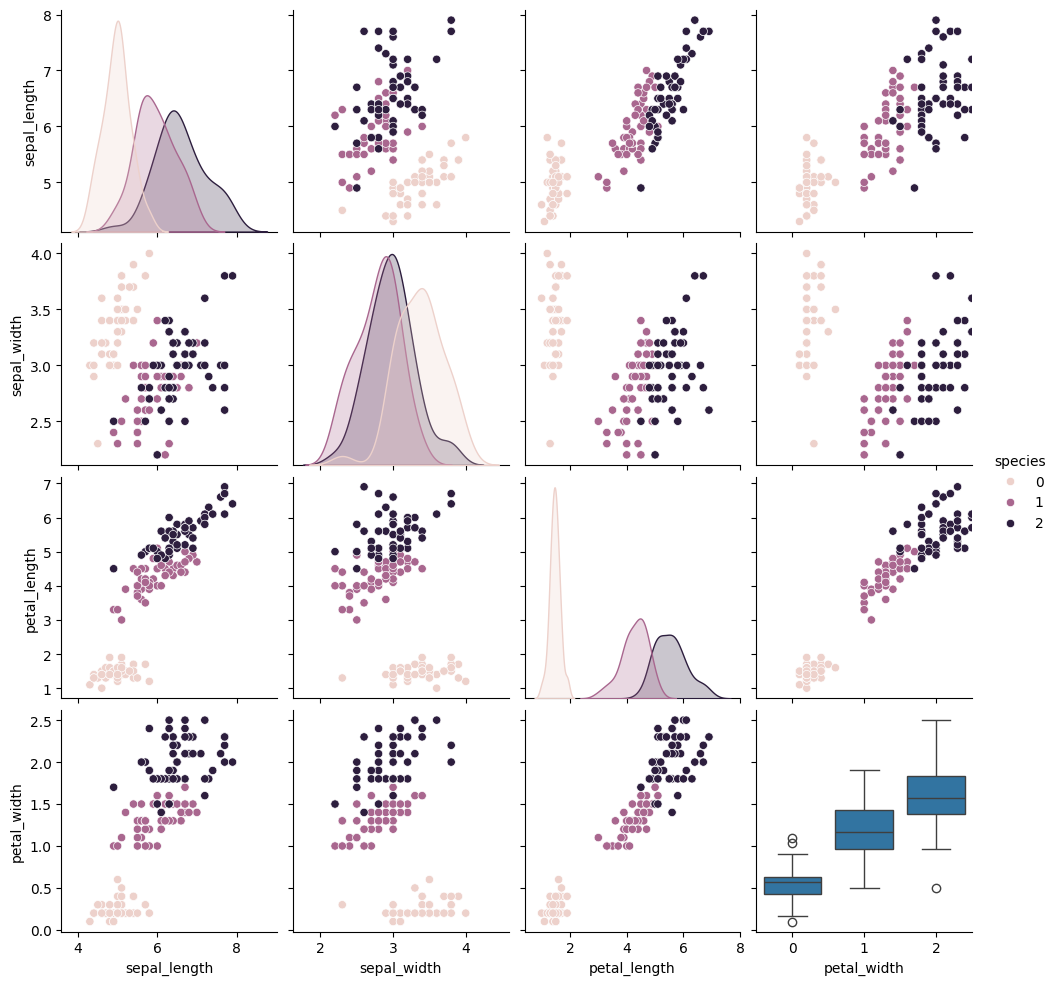

In [90]:
# Pairplot and boxplot for data visualization
sns.pairplot(df, hue='species')
sns.boxplot(x='species', y='sepal_length', data=df)